In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [ ]:
# c = df.corr(numeric_only=True, method='pearson')
# sns.heatmap(data=c, annot=True, annot_kws={'fontsize':24})


# sns.histplot(data=df, x='x', binwidth=2000)

# sns.pairplot(data=df)

# iloc[:, [1,2]] paima visas eilutes ir 1 ir 2 stulpeli

In [ ]:
# suraskite, ar yra koreliacija tarp šių parametrų - ridos, kainos, automobilio amžiaus,
# variklio tūrio.
# Vizualizuokite tai su heatmap
# . Su histograma atvaizduokite automobilių amžiaus pasiskirstymą. 

# ar yra priklausomybė tarp butų amžiaus ir kainos?
# Tarp butų kambarių kiekio ir kainos? Panaudokite heatmap.
# Su histograma atvaizduokite butų plotų pasiskirstymą. 
#

#Atvaizduokite top3 gamintojų skelbimų ir ridų kainų pasiskirstymą su histograma.
# Panaudokite hue raktažodį bei multipla raktažodį,
# išbandykite multiple raktažodžio galimas reikšmes.
# Kuris histogramos variantas yra infromatyviausias?

In [21]:
# suraskite, ar yra koreliacija tarp šių parametrų - ridos, kainos, automobilio amžiaus,
# variklio tūrio.
# Vizualizuokite tai su heatmap
# . Su histograma atvaizduokite automobilių amžiaus pasiskirstymą.

SDB = sqlite3.connect('Auto.db')
C = SDB.cursor()
sql="""select * from Autopliuslt;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
SDB.close()

df.head()

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,Ilgis,Aukstis,TechApžiuraIki,COemisijagkm,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai
0,A26894037,Peugeot,208,19 500,49 452 km,"1199 cm³, 131 AG (96kW)",Benzinas,Automatinė,Priekiniai,None,...,None,None,None,122 g/km,Euro 6,0 €,None,Klimato kontrolė,5,R17
1,A26868959,Volkswagen,Golf,5 950,250 000 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Visi varantys (4х4),None,...,None,None,2026-09,143 g/km,None,80.94 €,None,Klimato kontrolė,5,R18
2,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,None,None,None,~ 147 g/km,None,~ 40.47 €,None,Klimato kontrolė,5,None
3,A26868889,Ford,Focus,2 950,213 000 km,"1596 cm³, 101 AG (74kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,None,2026-09,None,None,None,HPTHK...\n Rodyti,Klimato kontrolė,5,R16
4,A26888945,Porsche,Cayenne,5 850,259 000 km,"4500 cm³, 450 AG (331kW)",Benzinas,Automatinė,None,None,...,None,None,2025-05,~ 378 g/km,None,~ 364.23 €,None,None,None,None


In [22]:
df.columns

Index(['ID', 'Marke', 'Modelis', 'Kaina', 'Rida', 'Variklis', 'Kuras',
       'PavaruDeze', 'VarantiejiRatai', 'BaterijosTalpakWh',
       'ElektraNuvažiuojamasAtstumas', 'Ikraunamas', 'Defektai', 'Spalva',
       'KebuloTipas', 'Vairas', 'VidutinesSanaudos', 'MiesteSanaudos',
       'UzmiestyjeSanaudos', 'PirmaRegistracija',
       'PirmosiosRegistracijosSalis', 'RegistracijosData', 'BendrojiMase',
       'NuosavaMase', 'DuruSkaicius', 'KebuloNr', 'Ilgis', 'Aukstis',
       'TechApžiuraIki', 'COemisijagkm', 'EuroStandartas', 'TarsosMokestis',
       'SDK', 'KlimatoValdymas', 'SedimosVietos', 'Ratlankiai'],
      dtype='object')

In [23]:
def rida(x):
    if x != 'None':
        return int(x.replace(' ', '').replace('km', ''))
    else:
        return np.nan
        

def kaina(x):
    if x != 'None':
        return int(x.replace(' ', ''))

def amzius(x):
    if x != 'None':
        return int(2024 - int(x[:4]))

def galia(x):
    if 'kW' in x:
        return int(x.split('(')[-1][:-3])
    else:
        return 'None'
    
def turis(x):
    if 'cm³' in x:
        return int(x.split(' ')[0])
    
df['price'] = df['Kaina'].apply(kaina)
df['amzius'] = df['PirmaRegistracija'].apply(amzius)
df['rid'] = df['Rida'].apply(rida)
df['galia'] = df['Variklis'].apply(galia)
df['turis'] = df['Variklis'].apply(turis)
df.head()

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai,price,amzius,rid,galia,turis
0,A26894037,Peugeot,208,19 500,49 452 km,"1199 cm³, 131 AG (96kW)",Benzinas,Automatinė,Priekiniai,None,...,0 €,None,Klimato kontrolė,5,R17,19500,2.0,49452.0,96,1199.0
1,A26868959,Volkswagen,Golf,5 950,250 000 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Visi varantys (4х4),None,...,80.94 €,None,Klimato kontrolė,5,R18,5950,13.0,250000.0,77,1598.0
2,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,~ 40.47 €,None,Klimato kontrolė,5,None,18000,9.0,199000.0,180,1997.0
3,A26868889,Ford,Focus,2 950,213 000 km,"1596 cm³, 101 AG (74kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,HPTHK...\n Rodyti,Klimato kontrolė,5,R16,2950,14.0,213000.0,74,1596.0
4,A26888945,Porsche,Cayenne,5 850,259 000 km,"4500 cm³, 450 AG (331kW)",Benzinas,Automatinė,None,None,...,~ 364.23 €,None,None,None,None,5850,20.0,259000.0,331,4500.0


In [24]:
auto_df = df[['price', 'amzius', 'rid', 'turis']]
auto_df.head()

,price,amzius,rid,turis
0,19500,2.0,49452.0,1199.0
1,5950,13.0,250000.0,1598.0
2,18000,9.0,199000.0,1997.0
3,2950,14.0,213000.0,1596.0
4,5850,20.0,259000.0,4500.0


<Axes: >

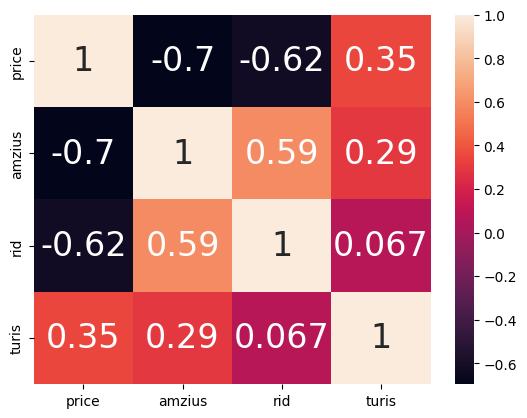

In [25]:
c = auto_df.corr(numeric_only=True, method='pearson')
c
sns.heatmap(data=c, annot=True, annot_kws={'fontsize':24})

<Axes: xlabel='amzius', ylabel='Count'>

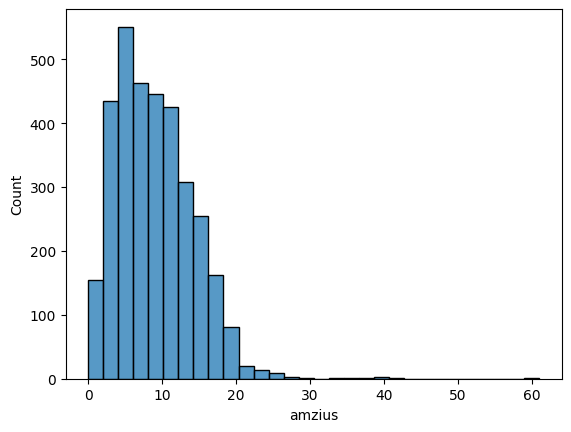

In [26]:
sns.histplot(data=auto_df, x='amzius', binwidth=2)

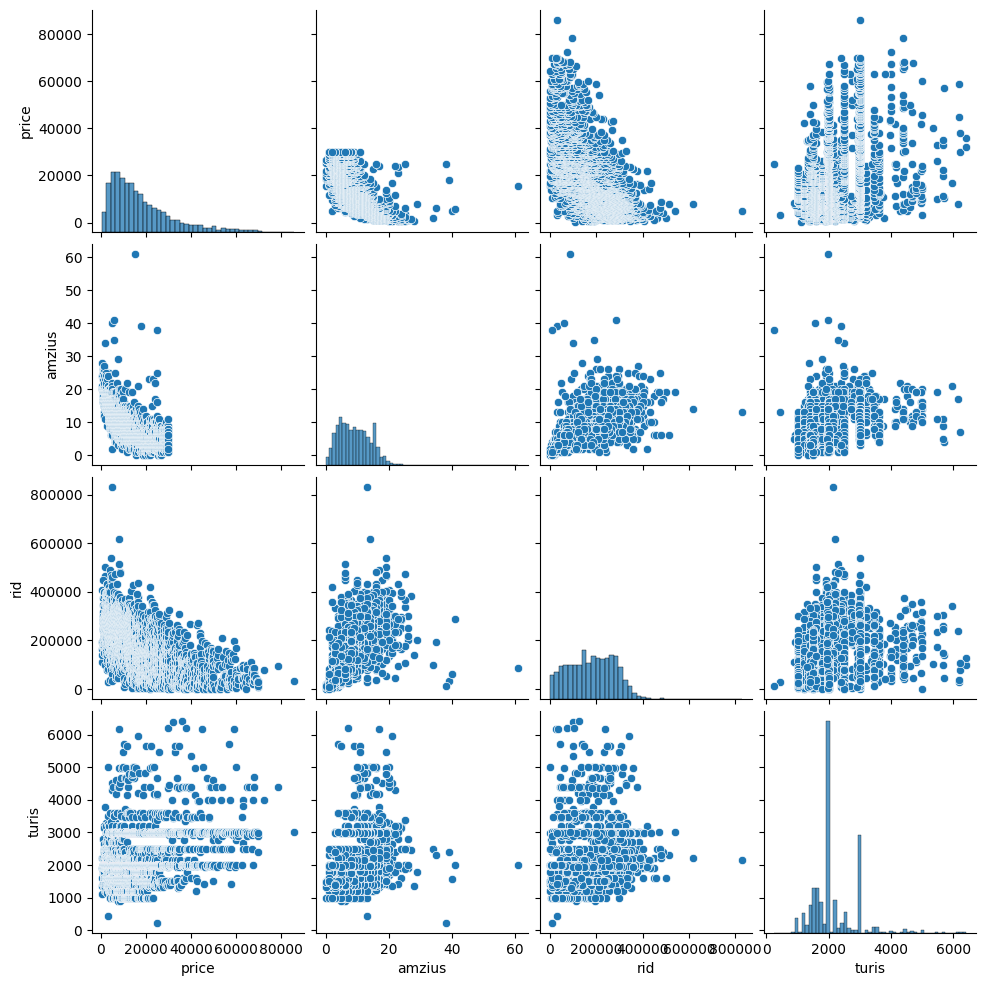

In [29]:
sns.pairplot(data=df)

In [30]:
# ar yra priklausomybė tarp butų amžiaus ir kainos?
# Tarp butų kambarių kiekio ir kainos? Panaudokite heatmap.
# Su histograma atvaizduokite butų plotų pasiskirstymą. 

SDB = sqlite3.connect('aruodas.db')
C = SDB.cursor()
sql="""select * from Aruodas;"""
adf_with_dubs = pd.read_sql_query(sql, con=SDB)
adf = adf_with_dubs.drop_duplicates()
SDB.close()

adf.head()

,miestas,rajonas,gatve,kaina,kv_kaina,nuoroda,Namo numeris:,Buto numeris:,Unikalus daikto numeris (RC numeris):,Plotas:,...,Metai:,Pastato tipas:,Šildymas:,Įrengimas:,Pastato energijos suvartojimo klasė:,Ypatybės:,Papildomos patalpos:,Papildoma įranga:,Apsauga:,Objektas:
0,Vilnius,Šnipiškės,Verkių g.,205000,3076.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,5A,55,1097-1012-6150,"66,64 m²",...,2003,Mūrinis,Centrinis,Įrengtas,A,Tualetas ir vonia atskirai\nInternetas\nVirtuv...,Balkonas\nVieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Kodinė laiptinės spyna,None
1,Palanga,Šventoji,Prieplaukos g.,250000,5065.0,https://www.aruodas.lt/butai-palangoje-sventoj...,14,11,None,"49,36 m²",...,2020,Mūrinis,Aeroterminis,Įrengtas,None,None,None,None,None,None
2,Palanga,Palanga,A. Mickevičiaus g.,268000,7657.0,https://www.aruodas.lt/butai-palangoje-palango...,None,None,None,35 m²,...,2023,Kita,Centrinis kolektorinis,Įrengtas,B,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nTerasa\nVieta automobiliui,Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None
3,Vilnius,Šnipiškės,A. Juozapavičiaus g.,615000,6276.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,9A,None,None,98 m²,...,2008,Mūrinis,Centrinis,Įrengtas,A+,Atskiras įėjimas\nAukštos lubos\nNauja kanaliz...,Sandėliukas\nBalkonas\nTerasa\nVieta automobiliui,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna\nVaizd...,None
4,Vilnius,Fabijoniškės,Vėtrungių g.,131000,2620.0,https://www.aruodas.lt/butai-vilniuje-fabijoni...,83,None,None,50 m²,...,2005,Mūrinis,Centrinis kolektorinis,Įrengtas,None,Yra liftas,None,None,None,None


In [36]:
def amzius(x):
    if int(x[:4]) >= 2024:
        return 1
    else:
        return  2024 - int(x[:4])

adf['amzius'] = adf['Metai:'].apply(amzius)

adf_ak = adf[['amzius', 'kv_kaina']]
adf_ak.head()

,amzius,kv_kaina
0,21,3076.0
1,4,5065.0
2,1,7657.0
3,16,6276.0
4,19,2620.0


In [37]:
adf_a_gr = adf_ak.groupby('amzius').mean(numeric_only=True).reset_index()
adf_a_gr.head()

,amzius,kv_kaina
0,1,3388.695704
1,2,4211.955645
2,3,4318.633094
3,4,4509.528169
4,5,4019.973214


<Axes: xlabel='amzius', ylabel='kv_kaina'>

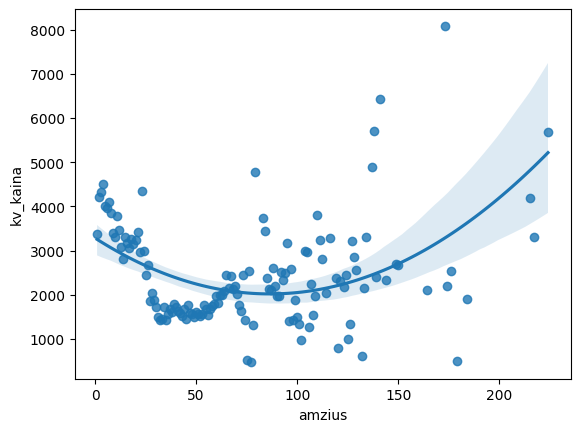

In [42]:
sns.regplot(data=adf_a_gr[adf_a_gr['amzius'] < 250], x='amzius', y='kv_kaina', order=2)

<Axes: xlabel='plotas', ylabel='Count'>

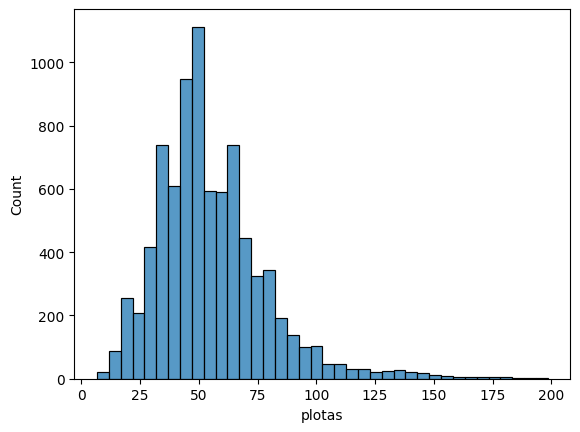

In [51]:
def plotas(x):
    # if 'm²' in x:
    if x is not None:
        return float(x.replace(' m²', '',).replace(',', '.'))
    else:
        return np.nan
    
adf['plotas'] = adf['Plotas:'].apply(plotas)

sns.histplot(data=adf[adf['plotas'] < 200], x='plotas', binwidth=5, bins='auto')

<Axes: >

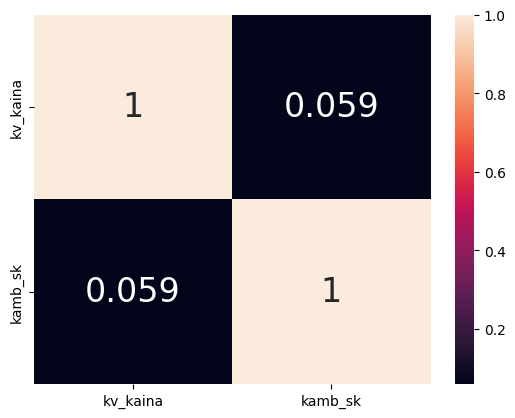

In [53]:
kam_adf = adf[['Kambarių sk.:','kv_kaina'] ]
kam_adf['kamb_sk'] = kam_adf['Kambarių sk.:'].apply(lambda x: int(x))
c = kam_adf.corr(numeric_only=True, method='pearson')

sns.heatmap(data=c, annot=True, annot_kws={'fontsize':24})

In [55]:
#Atvaizduokite top3 gamintojų skelbimų ir ridų kainų pasiskirstymą su histograma.
# Panaudokite hue raktažodį bei multipla raktažodį,
# išbandykite multiple raktažodžio galimas reikšmes.
# Kuris histogramos variantas yra infromatyviausias?

top3 = df['Marke'].value_counts().head(3).index.to_list()
print(top3)

['BMW', 'Volkswagen', 'Audi']


In [56]:
df1 = df[df['Marke'].isin(top3)][['price', 'rid', 'Kuras']]
df1.head()

,price,rid,Kuras
1,5950,250000.0,Dyzelinas
2,18000,199000.0,Benzinas
6,8600,242000.0,Benzinas
9,2350,286249.0,Benzinas
12,3950,402000.0,Dyzelinas


<Axes: xlabel='price', ylabel='Count'>

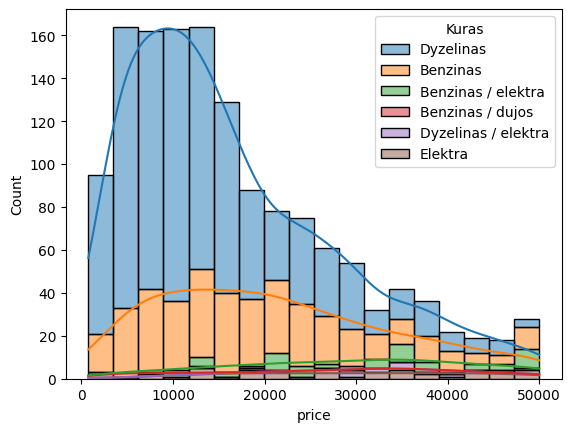

In [66]:
sns.histplot(data=df1[df1['price'] < 50000], x='price', hue='Kuras', multiple='stack', kde=True)

<Axes: xlabel='rid', ylabel='Count'>

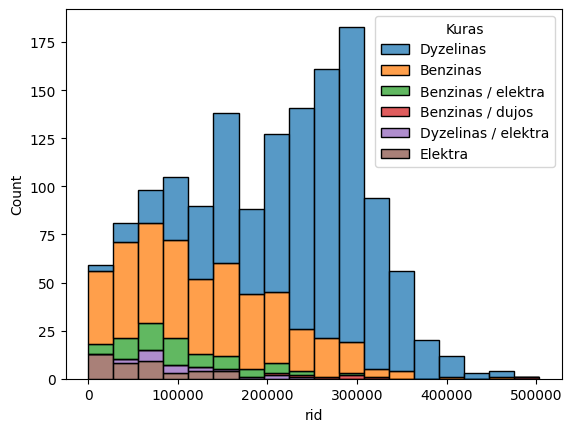

In [65]:
sns.histplot(data=df1, x='rid', hue='Kuras', multiple='stack')

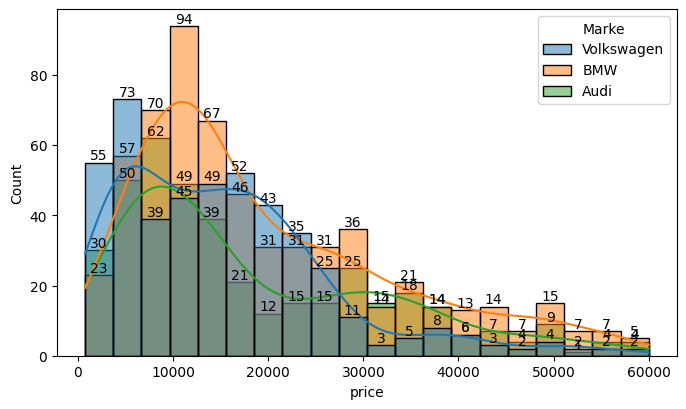

In [73]:
df2 = df[df['Marke'].isin(top3)][['price', 'rid', 'Kuras', 'Marke']]
df2.head()

fig, ax = plt.subplots(figsize=(8, 4.5))
sns.histplot(data=df2[df2['price'] < 60000], x='price', hue='Marke', kde=True, bins=20)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [87]:
#Išanalizuokite elektromobilių pasiūlą - ridos, amžiaus, baterijos talpos,
# nuvažiuojamo atstumo įtaką kainai, 
# raskite ir vizualizuokite koreliacijų tarp šių parametrų dydžius. 
# Panaudokite heatmap, pairplot, histplot.

elektra = df[df['Kuras'] == 'Elektra'][['rid', 'amzius', 'BaterijosTalpakWh', 'ElektraNuvažiuojamasAtstumas']]
elektra.head()

def talpa(x):
    if 'kWh' in x:
        return int(x.split(' ')[0])
    else:
        return np.nan

def atstumas(x):
    if 'km' in x:
        return int(x.split(' ')[0])
    else:
        return np.nan

elektra['talpa'] = elektra['BaterijosTalpakWh'].apply(talpa)
elektra['atstumas'] = elektra['ElektraNuvažiuojamasAtstumas'].apply(atstumas)




    


<Axes: >

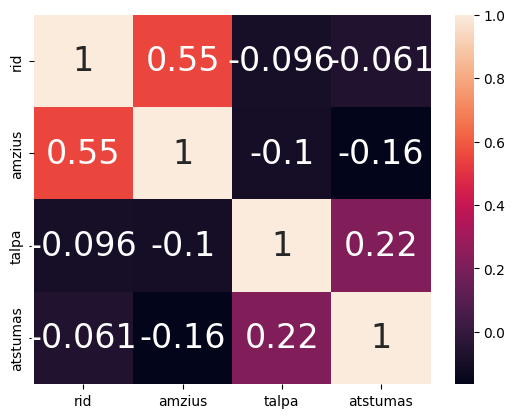

In [90]:
elektra1 = elektra[['rid', 'amzius', 'talpa', 'atstumas']]
# elektra1.head()


c = elektra1.corr(numeric_only=True)

sns.heatmap(data=c, annot=True, annot_kws={'fontsize':24})
# sns.heatmap(data=elektra1, annot=True, annot_kws={'fontsize':24})

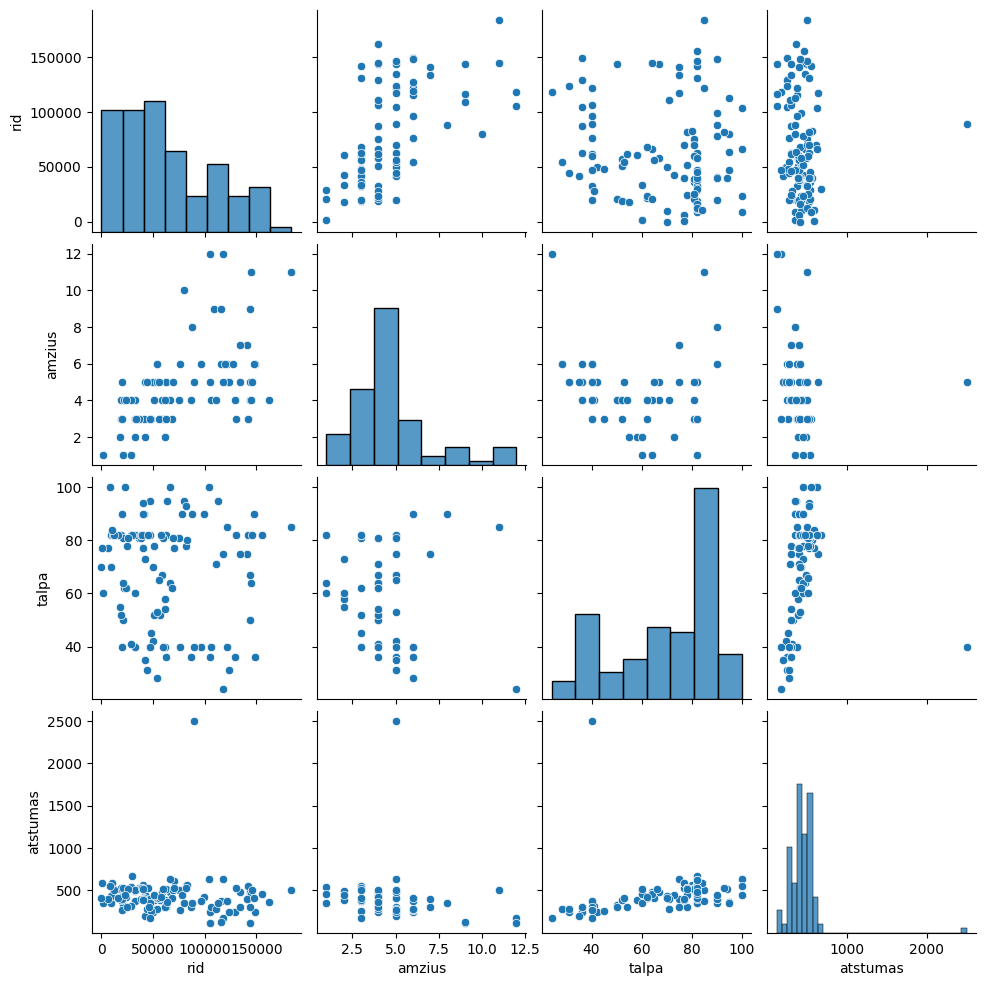

In [91]:
sns.pairplot(data=elektra1)

<Axes: xlabel='amzius', ylabel='Count'>

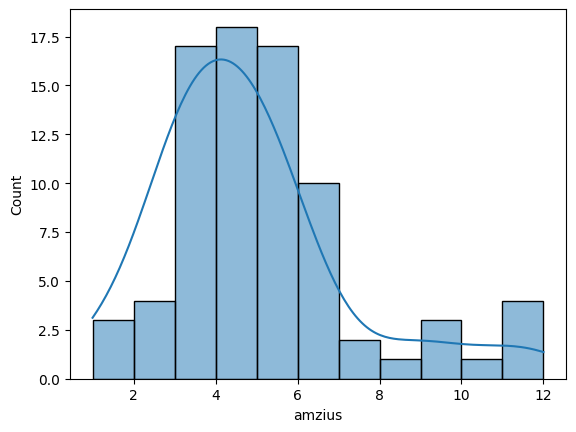

In [96]:
sns.histplot(data=elektra1, x='amzius', binwidth=1, kde=True)